# DRUG PERFORMANCE EVALUATION


The dataset contains data on disease conditions, drugs, the drug indications, the drug type whether they are over the counter, prescription based or not. It also contain data on effectiveness scores, satisfactory scores, the number of reviews on the drugs, ease of use scores and information about the drug and the disease condition it treats.

Our aim is to analyse drug performance metrics across drugs and disease classifications, this can potentially be of help to health professionals in drug selection for their patients.

We are also to build a streamlit app that recommends a drug based on these metrics.

# Questions to answer in the analysis.
1. What are the top-performing drugs overall?

    Based on average scores of effectiveness, ease of use, and satisfaction.

2. How do drug types (e.g., OTC vs. prescription) compare in performance?

3. Which disease conditions have the most reviewed drugs?(exlore the most common conditions, effectiveness and satisfaction of drugs across these condition category)

4. Are there any drugs that consistently underperform despite high review counts?

5. Which drugs perform best for each disease category?

6. Are there correlation between the metrics (effectiveness, satisfaction, ease of use and reviews)?

7. Is there a bias in reviews based on review count?
(e.g., low review drugs having extreme scores)


## 1. IMPORTING LIBRARIES AND LOADING THE DATA

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


In [ ]:
# Loading the data
drug_data = 'Drug.csv'

df = pd.read_csv(drug_data)

2. SUMMARY OF THE DATA


*   First few rows
*   Datatypes

*   Summary statistics

*   Shape of the data







In [ ]:
# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
display(df.head())

First 5 rows of the DataFrame:


,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...


In [ ]:
# Display data types of each column
print("\nData types of each column:")
df.info()


Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     2219 non-null   object 
 1   Drug          2219 non-null   object 
 2   Indication    2219 non-null   object 
 3   Type          2219 non-null   object 
 4   Reviews       2219 non-null   object 
 5   Effective     2219 non-null   float64
 6   EaseOfUse     2219 non-null   float64
 7   Satisfaction  2219 non-null   float64
 8   Information   2219 non-null   object 
dtypes: float64(3), object(6)
memory usage: 156.2+ KB


In [ ]:
# Display summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
display(df.describe().T)


Summary statistics of numerical columns:


,count,mean,std,min,25%,50%,75%,max
Effective,2219.0,3.557972,1.113128,1.0,3.00,3.68,4.33,5.0
EaseOfUse,2219.0,3.958824,1.037877,1.0,3.54,4.10,5.00,5.0
Satisfaction,2219.0,3.218774,1.230933,1.0,2.40,3.13,4.00,5.0


In [ ]:
# Display summary statistics of non-numerical columns
print("\nSummary statistics of non-numerical columns:")
display(df.describe(include='object'))


Summary statistics of non-numerical columns:


,Condition,Drug,Indication,Type,Reviews,Information
count,2219,2219,2219,2219,2219,2219
unique,37,470,3,4,241,421
top,fever,Acetaminophen,On Label,RX,1 Reviews,\r\n\t\t\t\t\t This is a brand name drug and a...
freq,308,114,1723,1401,563,116


In [ ]:
# shape of the data
print(f"Shape of the DataFrame:")
print(f"Number of rows : {df.shape[0]},  Number of columns : {df.shape[1]}")

Shape of the DataFrame:
Number of rows : 2219,  Number of columns : 9


3. DATA CLEANING


In [ ]:
# Check for missing values
print("Missing values per column:")
display(df.isnull().sum())

Missing values per column:


,0
Condition,0
Drug,0
Indication,0
Type,0
Reviews,0
Effective,0
EaseOfUse,0
Satisfaction,0
Information,0


There are no missing values in the dataset.

In [ ]:
# Checking for Data duplicates
print(f" The number of duplicated rows is : {df.duplicated().sum()}")

 The number of duplicated rows is : 466


In [ ]:
# Dropping the duplicated rows
df.drop_duplicates(keep= 'first',  inplace=True)
print(f" The number of duplicated rows is : {df.duplicated().sum()}")

 The number of duplicated rows is : 0


In [ ]:
# Resetting the index after dropping the duplicated rows
df.reset_index(drop=True, inplace=True)

In [ ]:
# Dropping columns not essential for analysis
df.drop(['Information'], axis=1, inplace=True)

In [ ]:
# Inspecting the condition column
print(df.Condition.unique())

['Acute Bacterial Sinusitis' 'adenocarcinoma of pancreas'
 'Atopic Dermatitis' 'back pain' 'Bacterial Conjunctivitis'
 'Bacterial Urinary Tract Infection' 'biliary calculus' 'chickenpox'
 'colorectal cancer' 'depression'
 'diverticulitis of gastrointestinal tract' 'edema' 'endometriosis'
 'fever' 'fibromyalgia' 'flatulence' 'furunculosis'
 'gastroesophageal reflux disease' 'genital herpes simplex' 'gout'
 'hemorrhoids' 'herpes zoster' 'hypercholesterolemia' 'hypertension'
 'impetigo' 'Infantile Autism' 'Influenza' "meniere's disease"
 'oral candidiasis' 'Pharyngitis due to Streptococcus Pyogenes'
 'prevention of cerebrovascular accident' 'pyelonephritis' 'scabies'
 'Sleepiness Due To Obstructive Sleep Apnea' 'sore throat' 'vertigo'
 'vulvovaginal candidiasis']


In [ ]:
# Formatting the values of the Condition column to capitalize each word
df['Condition'] = df['Condition'].str.title()
print(df.Condition.unique())

['Acute Bacterial Sinusitis' 'Adenocarcinoma Of Pancreas'
 'Atopic Dermatitis' 'Back Pain' 'Bacterial Conjunctivitis'
 'Bacterial Urinary Tract Infection' 'Biliary Calculus' 'Chickenpox'
 'Colorectal Cancer' 'Depression'
 'Diverticulitis Of Gastrointestinal Tract' 'Edema' 'Endometriosis'
 'Fever' 'Fibromyalgia' 'Flatulence' 'Furunculosis'
 'Gastroesophageal Reflux Disease' 'Genital Herpes Simplex' 'Gout'
 'Hemorrhoids' 'Herpes Zoster' 'Hypercholesterolemia' 'Hypertension'
 'Impetigo' 'Infantile Autism' 'Influenza' "Meniere'S Disease"
 'Oral Candidiasis' 'Pharyngitis Due To Streptococcus Pyogenes'
 'Prevention Of Cerebrovascular Accident' 'Pyelonephritis' 'Scabies'
 'Sleepiness Due To Obstructive Sleep Apnea' 'Sore Throat' 'Vertigo'
 'Vulvovaginal Candidiasis']


In [ ]:
# Removing 'Reviews' from the 'Reviews' column and converting to integer
df['Reviews'] = df["Reviews"].str.replace(' Reviews', '', regex=False).astype(int)
df['Reviews'].head(3)

,Reviews
0,994
1,755
2,584


In [ ]:
# Inspecting the indication and type column
print(df['Indication'].value_counts())
print(df['Type'].value_counts())

Indication
On Label     1339
Off Label     384
\r\n           30
Name: count, dtype: int64
Type
RX        1165
OTC        549
RX/OTC      34
\r\n         5
Name: count, dtype: int64


In [ ]:
# Renaming the \r\n to Unknown
df['Indication'] = df['Indication'].str.replace('\r\n', 'Unknown')
df['Type'] = df['Type'].str.replace('\r\n', 'Unknown')

In [ ]:
# Renaming the columns
column_names = {
    'Drug': 'drug',
    'Type': 'type',
    'Condition': 'condition',
    'Indication': 'indication',
    'Reviews': 'reviews',
    'Effective': 'effectiveness',
    'EaseOfUse': 'ease_of_use',
    'Satisfaction': 'satisfaction'
}

df.rename(columns=column_names, inplace=True)


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
reviews,1753.0,64.507701,227.264164,1.0,2.00,5.00,30.00,4647.0
effectiveness,1753.0,3.540331,1.121626,1.0,3.00,3.69,4.33,5.0
ease_of_use,1753.0,3.939817,1.043985,1.0,3.50,4.08,4.80,5.0
satisfaction,1753.0,3.179732,1.225715,1.0,2.34,3.11,4.00,5.0


4. DATA ANALYSIS

In [ ]:
#creating a copy of the dataframe for analysis
df_clean = df.copy()
df_clean.head()

,condition,drug,indication,type,reviews,effectiveness,ease_of_use,satisfaction
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994,2.52,3.01,1.84
1,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755,2.78,3.00,2.08
2,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57
3,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437,3.26,3.23,2.42
4,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,361,2.44,2.96,1.68


UNIVARIATE ANALYSIS

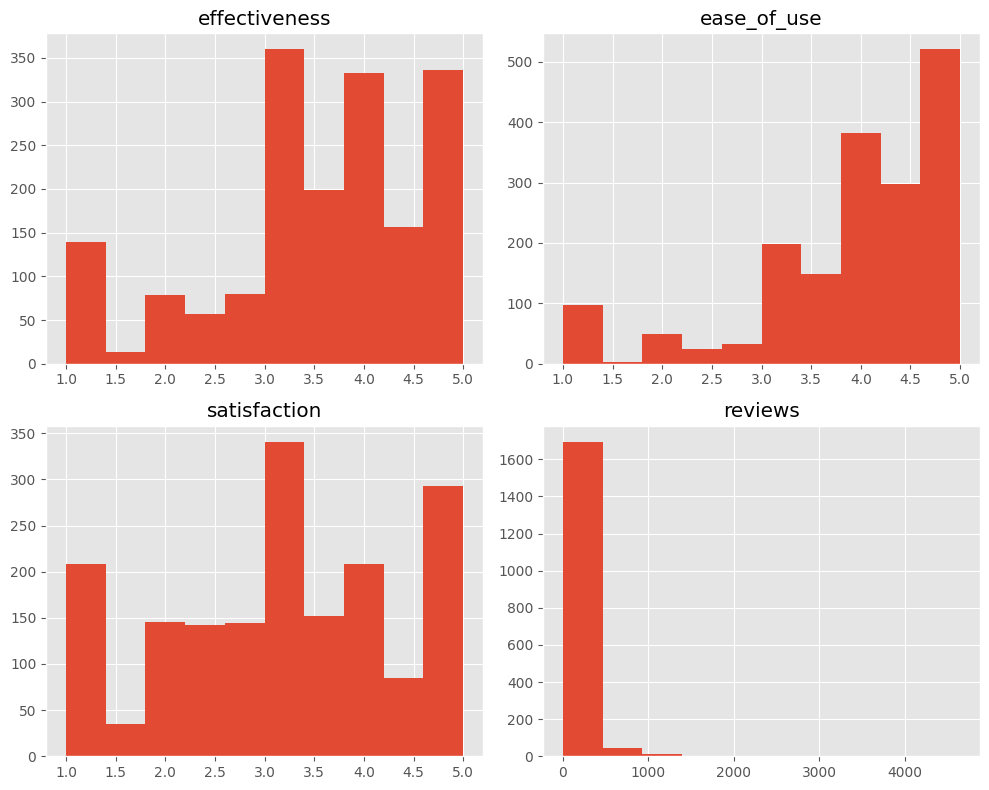

In [ ]:
# plotting the distribution of the numerical columns
df_clean[['effectiveness', 'ease_of_use', 'satisfaction', 'reviews']].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

The effectiveness, ease_of_use and satisfaction score shows clear distribution among the categories, while the number of reviews of the medications are densely stacked.
Effectiveness and ease of use score shows lower frequency below 3.0, this implies that there are more drugs rated to be moderately and highly effective and having better ease of use.
The satisfactory score shows peaks at the extreme and middle of the chart, while patients found most drugs to be effective and easy to use, the satisfactory score shows varied distribution.


In [ ]:
# Creating bins to categorize effectiveness, ease_of_use and satisfation score
df_clean['effectiveness_cat'] = pd.cut(df_clean['effectiveness'], bins=[0, 3, 4, 5], labels=['low', 'medium', 'high'])
df_clean['ease_of_use_cat'] = pd.cut(df_clean['ease_of_use'], bins=[0, 3, 4, 5], labels=['low', 'medium', 'high'])
df_clean['satisfaction_cat'] = pd.qcut(df_clean['satisfaction'], q = 5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

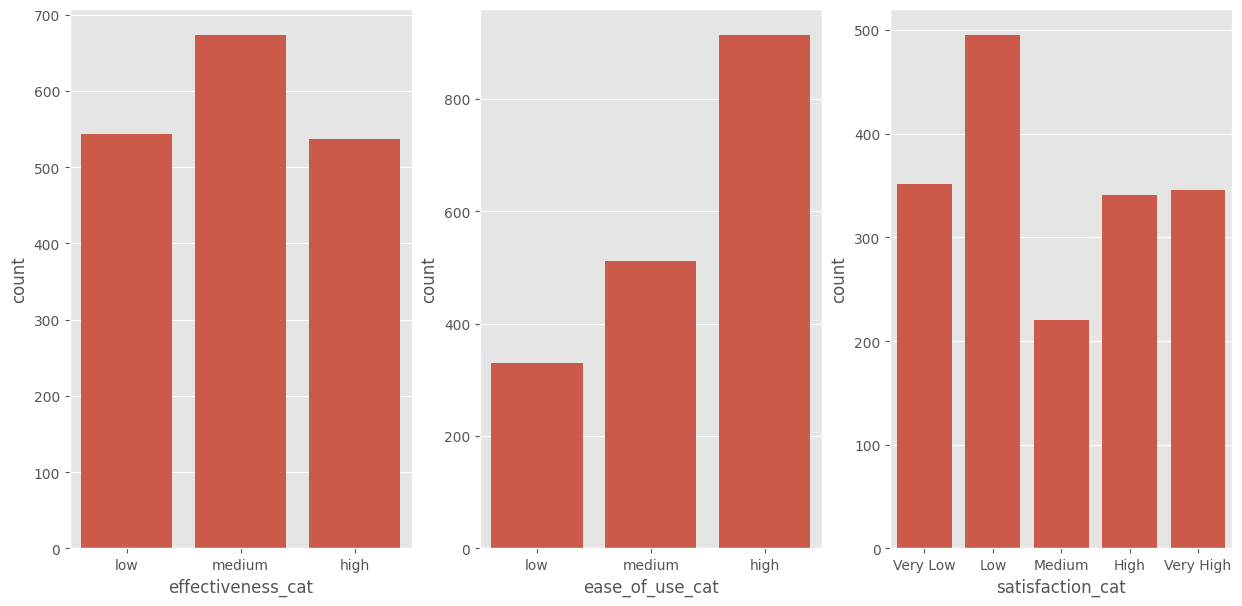

In [ ]:
#Plotting the categories of effectiveness, ease_of_use and satisfaction
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
sns.countplot(data=df_clean, x='effectiveness_cat', ax=axs[0])
sns.countplot(data=df_clean, x='ease_of_use_cat', ax=axs[1])
sns.countplot(data=df_clean, x='satisfaction_cat', ax=axs[2])
plt.show()

Effectivesness: The chart shows that the large group of drugs shows medium effectivesness, drugs with high and low effectiveness are similar in number.
Ease Of Use: The Count plot shows most drugs have very high ease_of_use, this implies that most drugs are easily to take in, drugs that are easy to use are the second largest while those with low ease of use have the least count.
Satisfaction: The countplot shows majority of the patients are not satisfied with their medications, patient that are satidfied with their medicines show the second highest count and those that show medium satisfactory have the lowest count.


/tmp/ipython-input-24-3198035562.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
/tmp/ipython-input-24-3198035562.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)


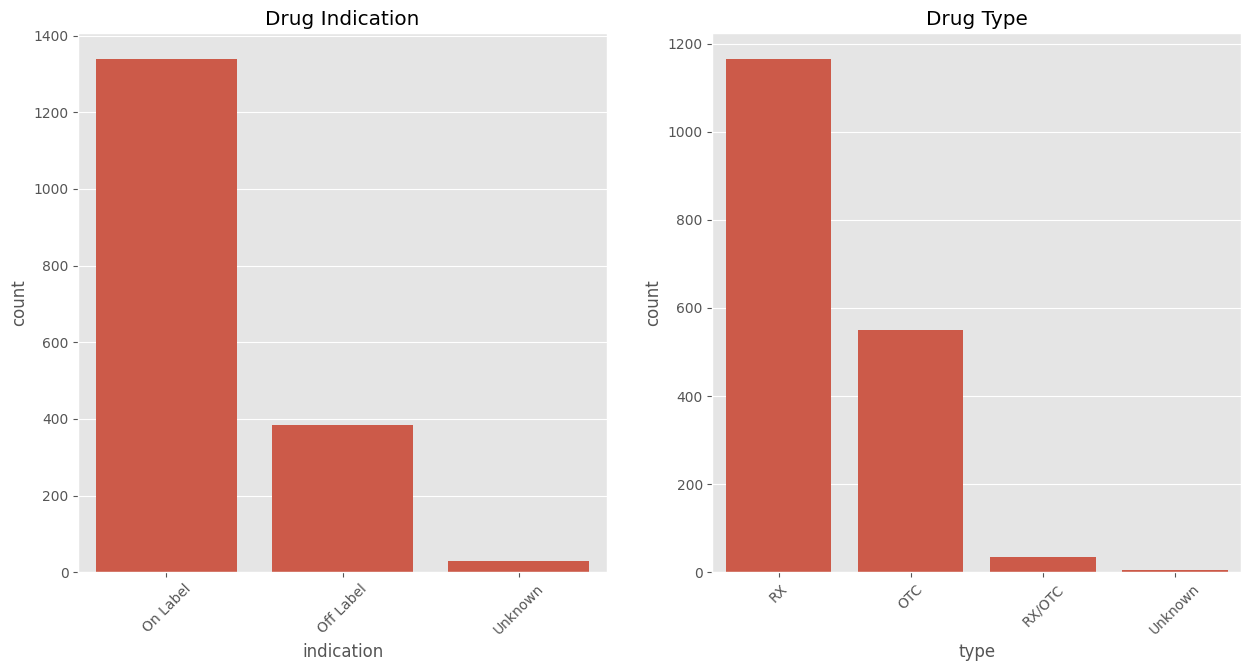

In [ ]:
# Visualizing the Drug indication and type
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.countplot(data=df_clean, x='indication', ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[0].set_title('Drug Indication')
sns.countplot(data=df_clean, x='type', ax=axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)
axs[1].set_title('Drug Type')
plt.show()

Indication: Majority of the drug used are On Label drugs - drugs that were used based on the FDA approved indications,less than 400 were used for off label indication, and very low number were based on unknown indications.
Drug type : Prescription based drugs are the most prescribed and dispensed drugs, followed by over the counter drugs, very few drugs are precription/over the counter and very few drugs are unknown.

BIVARIATE ANALYSIS

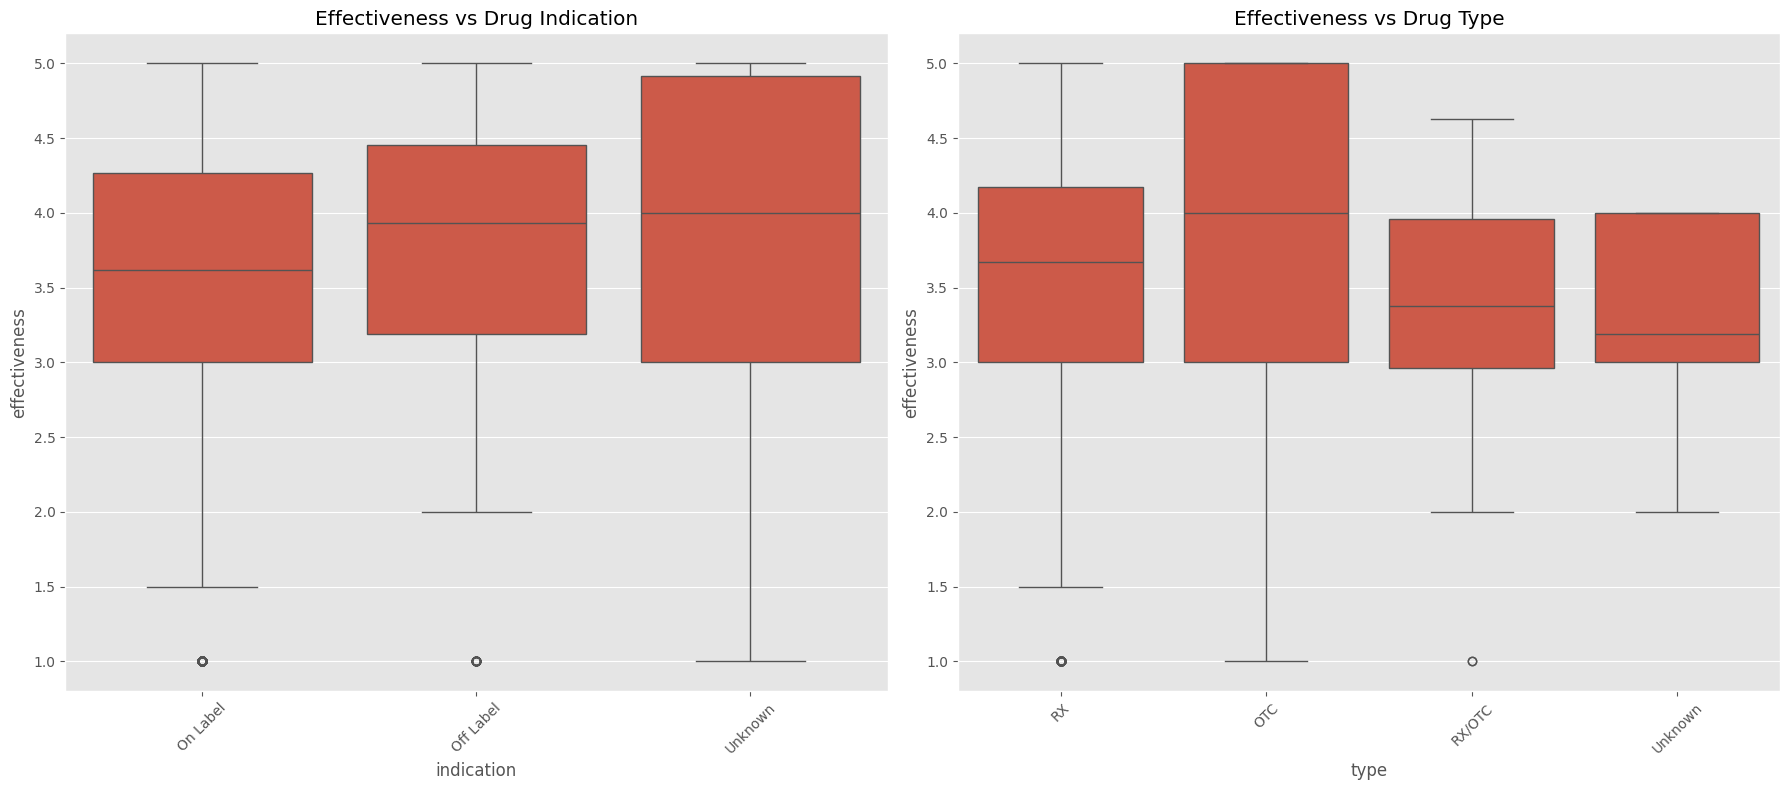

In [ ]:
# Drug effecctivenes vs indication
# Set up the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# First subplot: Effectiveness vs Indication
sns.boxplot(data=df_clean, x='indication', y='effectiveness', ax=axs[0])
axs[0].set_title('Effectiveness vs Drug Indication')
axs[0].tick_params(axis='x', rotation= 45)

# Second subplot: Effectiveness vs Type
sns.boxplot(data=df_clean, x='type', y='effectiveness', ax=axs[1])
axs[1].set_title('Effectiveness vs Drug Type')
axs[1].tick_params(axis='x', rotation=45)

# Adjust spacing
plt.tight_layout()
plt.show()

Drugs with unknown indication have the highest average effectiveness amongst the drugs, this is quite unusual, Off Label medications have higher average eefctiveness compare to On Label drugs.
OTC drugs have the highest effectiveness among drug types, this might be due to lower severity of the disease conditions popularly treated with over the counter medications, Prescription based drugs have the second highest average eeefctivenss amongs patients while RX/OTC and Unknown drug types have effectiveness lesser than 3.5.

MULTIVARIATE ANALYSIS

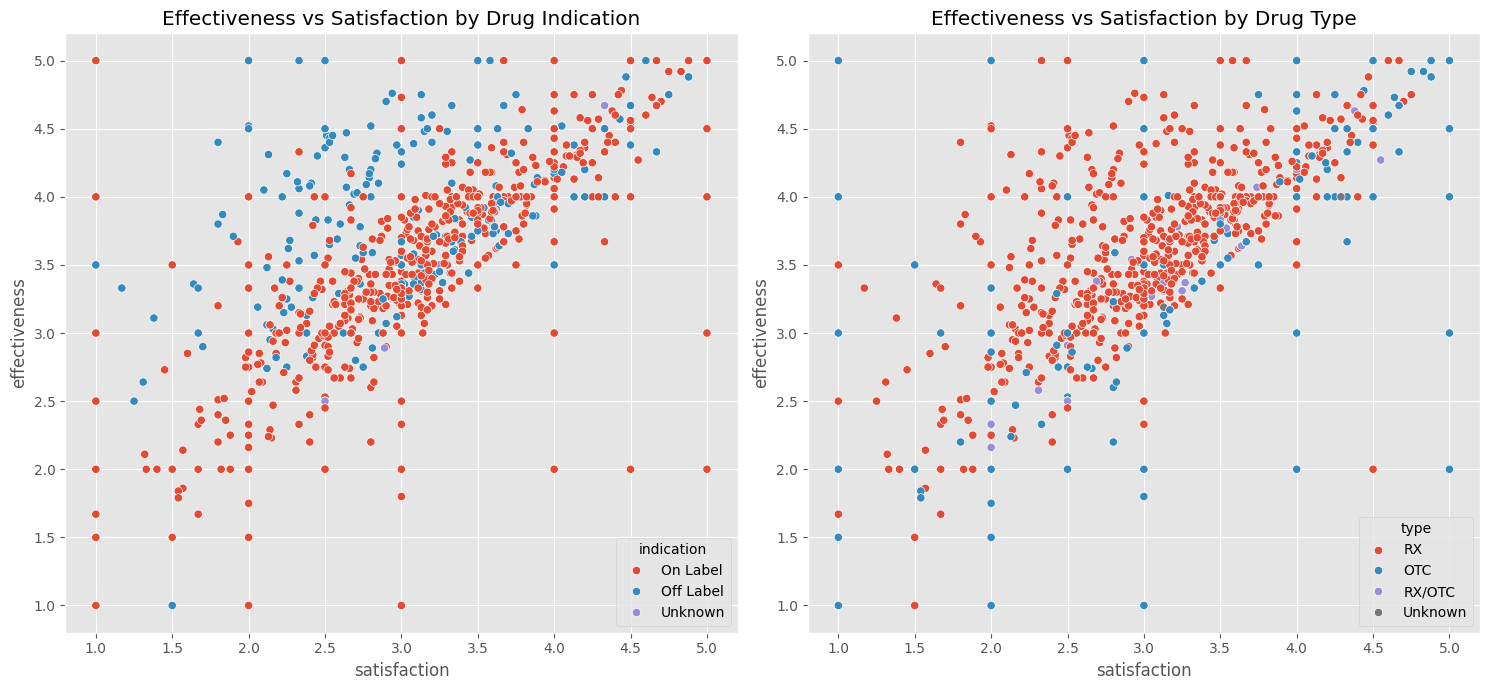

In [ ]:
# A chart of drugs effectiveness vs satisfaction labelled by the drug indication
# and type

# Set up the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot: colored by drug indication
sns.scatterplot(data=df_clean, x='satisfaction', y='effectiveness', hue='indication', ax=axs[0])
axs[0].set_title('Effectiveness vs Satisfaction by Drug Indication')

# Second subplot: colored by drug type
sns.scatterplot(data=df_clean, x='satisfaction', y='effectiveness', hue='type', ax=axs[1])
axs[1].set_title('Effectiveness vs Satisfaction by Drug Type')

plt.tight_layout()
plt.show()


There are no clear distinction between the drug indication categories and type categories with the distribution of drug satisfaction and effectivenes, no clear clusters were formed, this shows that the drug types and indications are widely distributed across the performance scores.

## 1. What are the top Perfoming drugs ovearall?

In [ ]:
# To understand and get  the top performing drugs overall using the effectiveness, satisfaction and ease of use score
# we are going to define a feature called performance that takes the average of the 3 metrics.
df_clean['performance'] = df_clean[['effectiveness', 'ease_of_use', 'satisfaction']].mean(axis=1)
# Defining a second feature called weighted performance that prioritize a drugs effectiveness.
df_clean['weighted_performance'] = (df_clean['effectiveness'] * 0.6 + df_clean['ease_of_use'] * 0.2 + df_clean['satisfaction'] * 0.2)

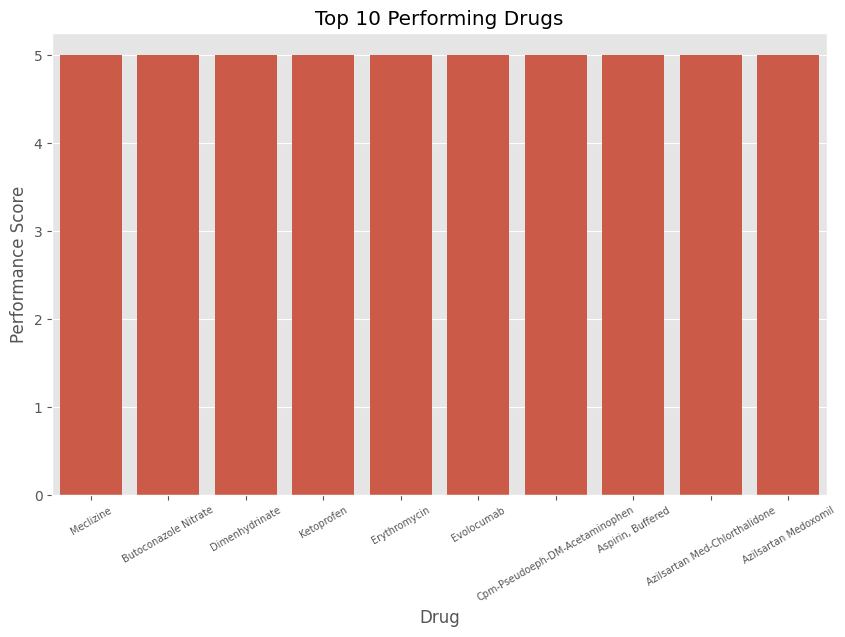

In [ ]:
# Visualizing the top 10 performing drugs by the performance
top_drugs = df_clean.sort_values(by='performance', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_drugs, x='drug', y='performance')
plt.title('Top 10 Performing Drugs')
plt.xlabel('Drug')
plt.ylabel('Performance Score')
plt.xticks(rotation=30, fontsize = 7)
plt.show()

Based on the perfomance scores, drug examples across different classes like antihistamines, antibiotics, antiinfectives, monoclonal antibodies, and drugs used to treat muscoloskeletal conditions generally have high performances.

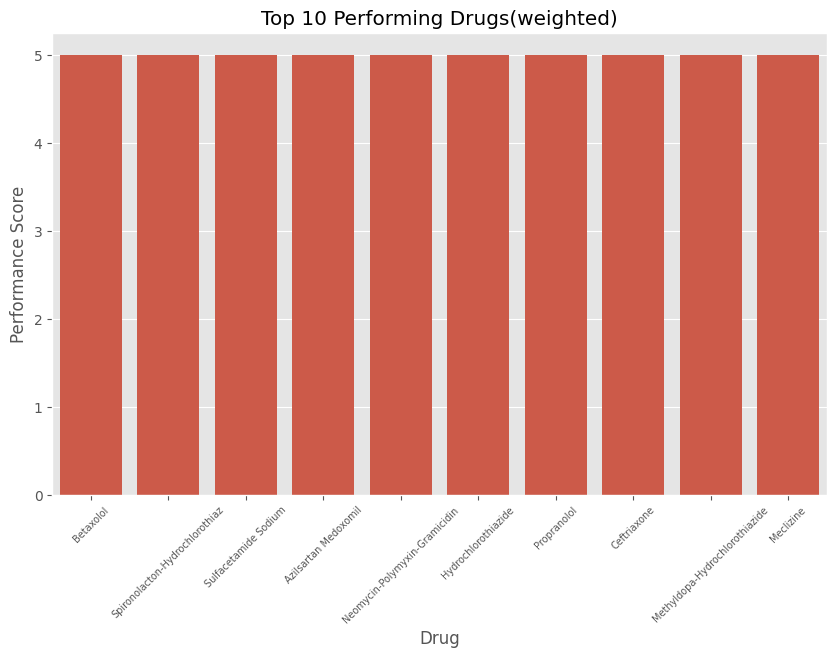

In [ ]:
# Visualizing the top perfroming drugs by their weighted performance
top_drugs_weighted = df_clean.sort_values(by='weighted_performance', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_drugs_weighted, x='drug', y='weighted_performance')
plt.title('Top 10 Performing Drugs(weighted)')
plt.xlabel('Drug')
plt.ylabel('Performance Score')
plt.xticks(rotation=45, fontsize = 7)
plt.show()

However, while using the weighted performance score that prioritizes effectiveness more than other score, the higher performing drugs now includes drugs from classes like antihypertensives and opthalmic drugs.

## 2. How do drug types (e.g., OTC vs. prescription) compare in performance?

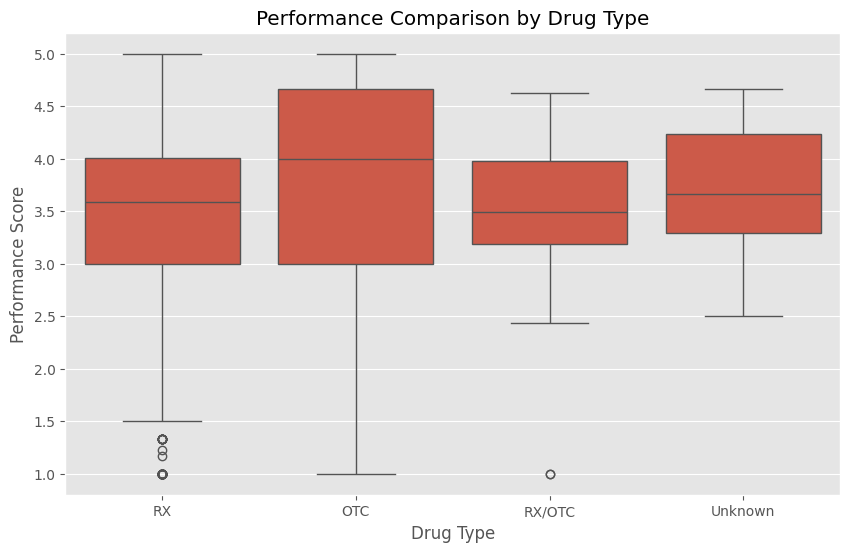

In [ ]:
# Visualizing a boxplot that compares the performance of drugs based on their types
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='type', y='performance')
plt.title('Performance Comparison by Drug Type')
plt.xlabel('Drug Type')
plt.ylabel('Performance Score')
plt.show()

On average, OTC drugs have higher performance compared to the other drug types, prescription based drugs perform on average closely to the unkown but has more drugs with better performance and worse performance compared to the unknown. Rx/OTC drugs have the lowest average performance of the drug type categories.

# 3. Which disease conditions and category has the most reviewed drugs?

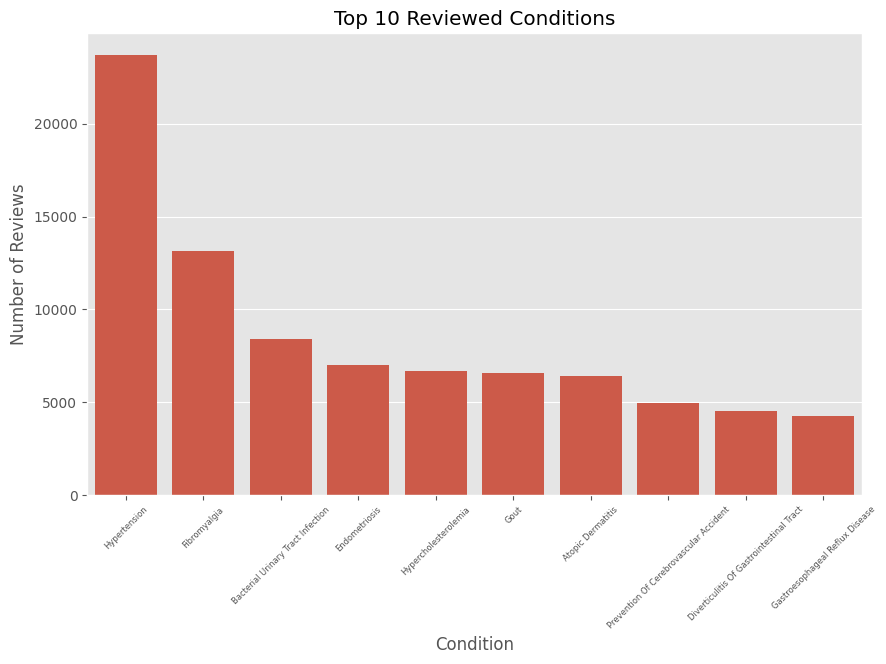

In [ ]:
# Visualizing the top 10 disease conditions with the most reviewd drugs
top_conditions = df_clean.groupby('condition')['reviews'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(top_conditions)
plt.title('Top 10 Reviewed Conditions')
plt.xlabel('Condition')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, fontsize = 6)
plt.show()

Hypertension, a chronic disease condition that affects a large part of the population especially the aging population has the most reviewed drugs, Fibromyalgia a muscolosceletal condition has the second most reviewed drug it is also a chronic condition with non specific known cause that affects people and disturbs their optimal daiily fucntion. Bacterial UTI has the third highest number of reviews.

In [ ]:
# Categorization of the disease conditions
# Clean condition names before mapping
df_clean['condition'] = df_clean['condition'].str.strip().str.title()
print(df_clean['condition'].unique())

['Acute Bacterial Sinusitis' 'Adenocarcinoma Of Pancreas'
 'Atopic Dermatitis' 'Back Pain' 'Bacterial Conjunctivitis'
 'Bacterial Urinary Tract Infection' 'Biliary Calculus' 'Chickenpox'
 'Colorectal Cancer' 'Depression'
 'Diverticulitis Of Gastrointestinal Tract' 'Edema' 'Endometriosis'
 'Fever' 'Fibromyalgia' 'Flatulence' 'Furunculosis'
 'Gastroesophageal Reflux Disease' 'Genital Herpes Simplex' 'Gout'
 'Hemorrhoids' 'Herpes Zoster' 'Hypercholesterolemia' 'Hypertension'
 'Impetigo' 'Infantile Autism' 'Influenza' "Meniere'S Disease"
 'Oral Candidiasis' 'Pharyngitis Due To Streptococcus Pyogenes'
 'Prevention Of Cerebrovascular Accident' 'Pyelonephritis' 'Scabies'
 'Sleepiness Due To Obstructive Sleep Apnea' 'Sore Throat' 'Vertigo'
 'Vulvovaginal Candidiasis']


In [ ]:

# Dictionary mapping each condition to a major disease class
disease_class_map = {
    # Infectious Diseases
    'Acute Bacterial Sinusitis': 'Infectious Disease',
    'Bacterial Conjunctivitis': 'Infectious Disease',
    'Bacterial Urinary Tract Infection': 'Infectious Disease',
    'Chickenpox': 'Infectious Disease',
    'Fever': 'Infectious Disease',
    'Furunculosis': 'Infectious Disease',
    'Genital Herpes Simplex': 'Infectious Disease',
    'Herpes Zoster': 'Infectious Disease',
    'Impetigo': 'Infectious Disease',
    'Influenza': 'Infectious Disease',
    'Oral Candidiasis': 'Infectious Disease',
    'Pharyngitis Due To Streptococcus Pyogenes': 'Infectious Disease',
    'Pyelonephritis': 'Infectious Disease',
    'Scabies': 'Infectious Disease',
    'Sore Throat': 'Infectious Disease',
    'Vulvovaginal Candidiasis': 'Infectious Disease',

    # Gastrointestinal
    'Biliary Calculus': 'Gastrointestinal',
    'Diverticulitis Of Gastrointestinal Tract': 'Gastrointestinal',
    'Flatulence': 'Gastrointestinal',
    'Gastroesophageal Reflux Disease': 'Gastrointestinal',
    'Hemorrhoids': 'Gastrointestinal',

    # Oncology
    'Adenocarcinoma Of Pancreas': 'Oncology',
    'Colorectal Cancer': 'Oncology',

    # Psychiatric / Mental Health
    'Depression': 'Psychiatric',

    # Dermatological
    'Atopic Dermatitis': 'Dermatological',

    # Cardiovascular
    'Edema': 'Cardiovascular',
    'Hypercholesterolemia': 'Cardiovascular',
    'Hypertension': 'Cardiovascular',
    'Prevention Of Cerebrovascular Accident': 'Cardiovascular',

    # Gynecological / Reproductive
    'Endometriosis': 'Gynecological',

    # Musculoskeletal
    'Back Pain': 'Musculoskeletal',
    'Fibromyalgia': 'Musculoskeletal',
    'Gout': 'Musculoskeletal',

    # Developmental
    'Infantile Autism': 'Developmental',

    # Neurological
    "Meniere'S Disease": 'Neurological',
    'Vertigo': 'Neurological',
    # Respiratory
    'Sleepiness Due To Obstructive Sleep Apnea': 'Respiratory'
}



In [ ]:
# Mapping the diseases to their categories
df_clean['disease_class'] = df_clean['condition'].map(disease_class_map)
print(df_clean['disease_class'].unique())

['Infectious Disease' 'Oncology' 'Dermatological' 'Musculoskeletal'
 'Gastrointestinal' 'Psychiatric' 'Cardiovascular' 'Gynecological'
 'Developmental' 'Neurological' 'Respiratory']


In [ ]:
# Checking for unmmapped disease categories
unmapped = df_clean[ df_clean['disease_class'].isna() ]['condition'].unique()
print(unmapped)


[]


In [ ]:
# Checking the value_counts of the disease_class
print(df_clean['disease_class'].value_counts())

disease_class
Infectious Disease    557
Cardiovascular        340
Gastrointestinal      219
Musculoskeletal       196
Dermatological        172
Gynecological         149
Neurological           66
Psychiatric            28
Oncology               15
Developmental           7
Respiratory             4
Name: count, dtype: int64


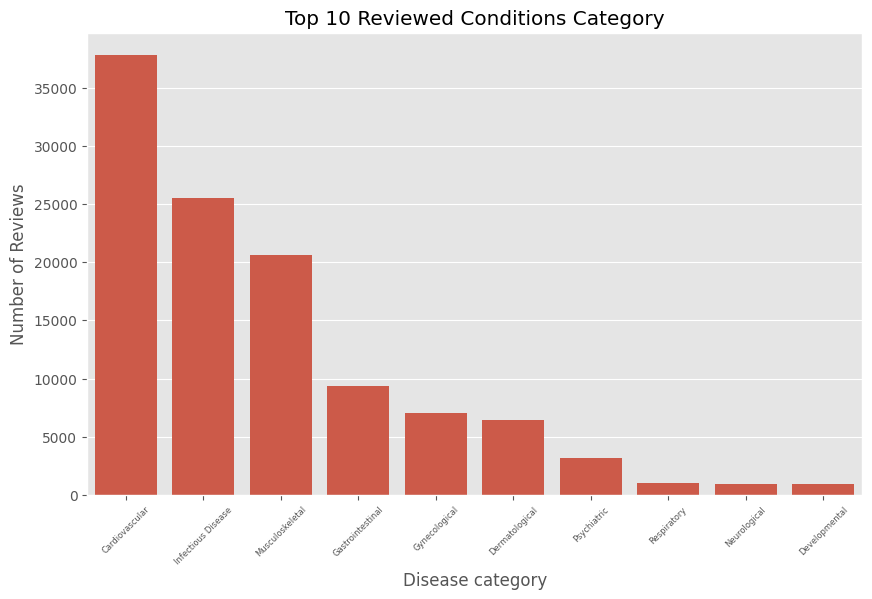

In [ ]:
# viewing the top condition categories that has the highest review
top_conditions = df_clean.groupby('disease_class')['reviews'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(top_conditions)
plt.title('Top 10 Reviewed Conditions Category')
plt.xlabel('Disease category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, fontsize = 6)
plt.show()

Cardiovascular conditions like hypertension, edema, hypercholesterolemia e.t.c have the highest reviewed drugs, followed by infectious diseases like, Chickenpox, Influeza, herpes e.t.c then Musculoskeletal conditions like Back pain, Fribromyalgia and gout.

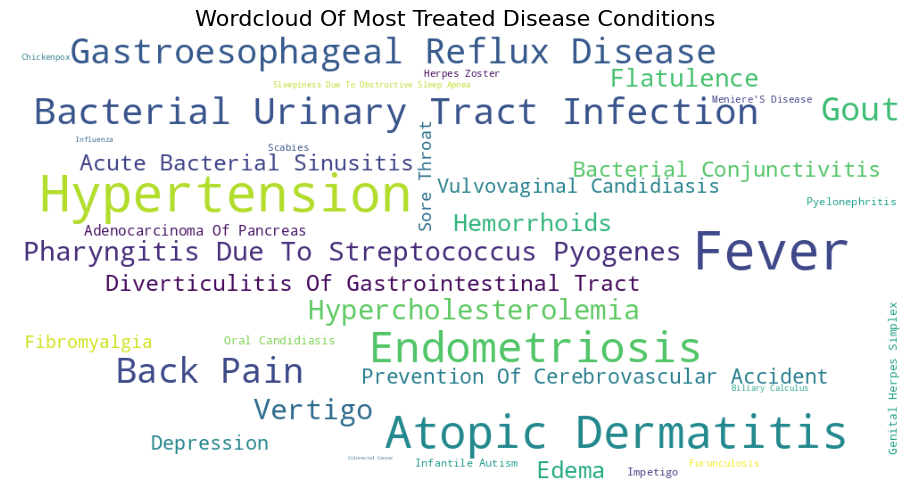

In [ ]:
# Wordcloud of the most treated sisease conditions
from collections import Counter
from wordcloud import WordCloud

# Step 1: Count frequency of condition phrases
condition_counts = Counter(df_clean['condition'].dropna().astype(str))

# Step 2: Generate WordCloud using those frequencies directly
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    max_font_size=60,
    colormap='viridis'
).generate_from_frequencies(condition_counts)

# Step 3: Plot
plt.figure(figsize=(11, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Wordcloud Of Most Treated Disease Conditions', fontsize=16)
plt.tight_layout()
plt.show()


The wordcloud shows the most popolarly treated disease conditions, it shows common disease names like Hypertension, Atopic Dermatitis, Fever, endometriosis e.t.c.

In [ ]:
# Creating a function that groups a column by and calculates a metric of another column.
def group_and_calculate(df, group_col, calc_col, metric='mean'):
    """
    Group a DataFrame by a specified column and calculate a summary metric on another column.

    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame to operate on.

    group_col : str
        The name of the column to group by.

    calc_col : str
        The name of the column to calculate the summary statistic on.

    metric : str, optional (default='mean')
        The aggregation metric to apply.
        Supported values include: 'mean', 'sum', 'count', 'min', 'max', 'median', etc.

    Returns:
    -------
    pandas.Series
        A sorted Series with the grouped metric values.

    Example:
    --------
    >>> group_and_calculate(df, group_col='disease_class', calc_col='effectiveness', metric='mean')
    """
    grouped = df.groupby(group_col)[calc_col].agg(metric).sort_values(ascending = True)
    return grouped

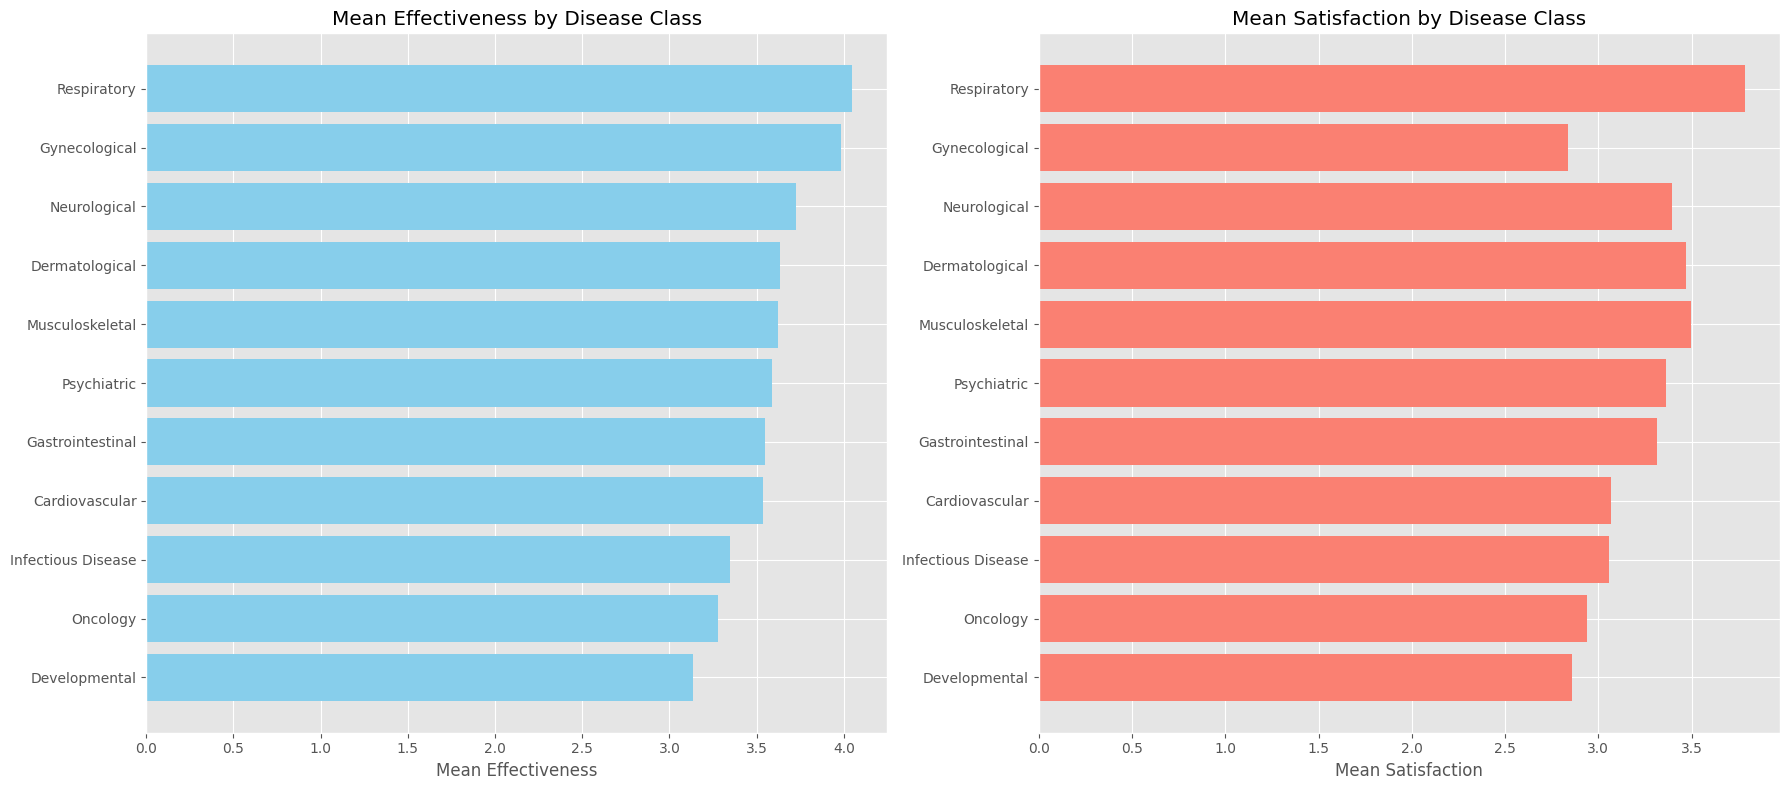

In [ ]:
# Group and sort by mean effectiveness and satisfaction
disease_class_effectiveness = group_and_calculate(df=df_clean, group_col='disease_class', calc_col='effectiveness')
disease_class_satisfaction = group_and_calculate(df=df_clean, group_col='disease_class', calc_col='satisfaction').loc[disease_class_effectiveness.index]

# Set up the subplots sharing the y-axis
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# First plot: Effectiveness
axs[0].barh(disease_class_effectiveness.index, disease_class_effectiveness.values, color='skyblue')
axs[0].set_title('Mean Effectiveness by Disease Class')
axs[0].set_xlabel('Mean Effectiveness')

# Second plot: Satisfaction (aligned by same order as effectiveness)
axs[1].barh(disease_class_satisfaction.index, disease_class_satisfaction.values, color='salmon')
axs[1].set_title('Mean Satisfaction by Disease Class')
axs[1].set_xlabel('Mean Satisfaction')

plt.tight_layout()
plt.show()


The charts shows mean effectiveness and satisfaction comparism of drugs in each disease class, respiratory drugs show the highest effectiveness and satisfaction.

In [ ]:
# Listing out the diseases and drugs used to treat respiratory illness
# Filter rows where disease_class is Respiratory
respiratory_df = df_clean[df_clean['disease_class'] == 'Respiratory']

# Get unique pairs of condition and drug
respiratory_conditions_drugs = respiratory_df[['condition', 'drug']].drop_duplicates().sort_values(by='condition')

# Display the result
print("Diseases and drugs used in treating Respiratory illness:\n")
print(respiratory_conditions_drugs.to_string(index=False))


Diseases and drugs used in treating Respiratory illness:

                                condition        drug
Sleepiness Due To Obstructive Sleep Apnea   Modafinil
Sleepiness Due To Obstructive Sleep Apnea Armodafinil


## 4. Are there any drugs that consistently underperform despite high review counts?

In [ ]:
# Filter drugs with low performance (≤2) and high number of reviews (>5000)
low_perf_high_review = df_clean.loc[
    (df_clean['performance'] <= 2) & (df_clean['reviews'] > 5000)
]


# Display summary
print(f"\n Drugs with LOW performance (≤2) but HIGH reviews (>5000):\n")
print(
    low_perf_high_review[['drug', 'condition', 'performance', 'reviews']]
    .drop_duplicates()
    .to_string(index=False)
)



 Drugs with LOW performance (≤2) but HIGH reviews (>5000):

Empty DataFrame
Columns: [drug, condition, performance, reviews]
Index: []


There are no drugs with low performance and high number of reviews.

## 5. Which drugs perform best within each disease category?

In [ ]:
# Adding a review filter that shows the drugs with higher number of reviews
df_clean_filtered = df_clean[df_clean['reviews'] >= 50]
#  Group by disease class, drug, and condition to get performance and review count
grouped = df_clean_filtered.groupby(['disease_class', 'drug', 'condition']).agg(
    avg_performance=('weighted_performance', 'mean'),
    total_reviews=('reviews', 'sum')
).reset_index()

#  Sort and get top 2 per disease class
top_performers = grouped.sort_values(['disease_class', 'avg_performance'], ascending=[True, False])
top_drugs_per_class = top_performers.groupby('disease_class').head(2).reset_index(drop=True)

#  Display
display(top_drugs_per_class)


,disease_class,drug,condition,avg_performance,total_reviews
0,Cardiovascular,Aspirin,Prevention Of Cerebrovascular Accident,4.400000,55
1,Cardiovascular,Cholestyramine-Aspartame,Hypercholesterolemia,4.320000,57
2,Dermatological,Fluocinonide,Atopic Dermatitis,4.700000,68
3,Dermatological,Betamethasone Dipropionate,Atopic Dermatitis,4.056000,57
4,Developmental,Paliperidone,Infantile Autism,3.980000,168
5,Developmental,Aripiprazole,Infantile Autism,3.188000,53
6,Gastrointestinal,Ranitidine Hcl,Gastroesophageal Reflux Disease,4.204000,189
7,Gastrointestinal,Rabeprazole,Gastroesophageal Reflux Disease,4.174000,297
8,Gynecological,Norethindrone Ac-Eth Estradiol,Endometriosis,4.008000,126
9,Gynecological,Norgestrel-Ethinyl Estradiol,Endometriosis,3.979333,376


The table shows the top two top performing drugs with 50 or more reviews, for a specific disease class, the disease being treatedm the average performance and the ratings.

Correlation heatmap to visualize the correlation of the numeric features.

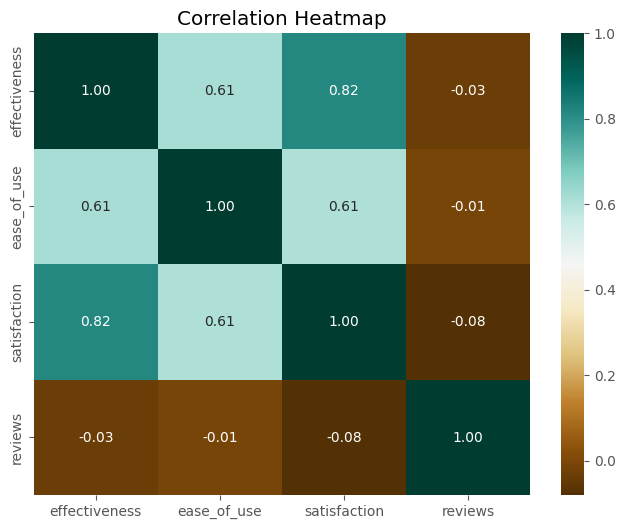

In [ ]:
# Correlation heatmap of the effectiveness, ease of use and satisfaction score
correlation_matrix = df_clean[['effectiveness', 'ease_of_use', 'satisfaction','reviews']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="BrBG", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap shows that there is positive correlation among effectiveness, ease_of_use and satisfaction score, reviews show weak negative correlation to the other variables, this shows that the number of reviews given on a drugs aren't correlated to the performance scores. Patients satisfation is strongly correlated with drugs effectiveness, but shows a lower correlation for ease of drug use.

## 7. Is there a bias in reviews based on Performance?

In [ ]:
# Grouping reviews into low, medium and high
df_clean['review_category'] = pd.qcut(df_clean['reviews'], q=3, labels=['low', 'medium', 'high'])

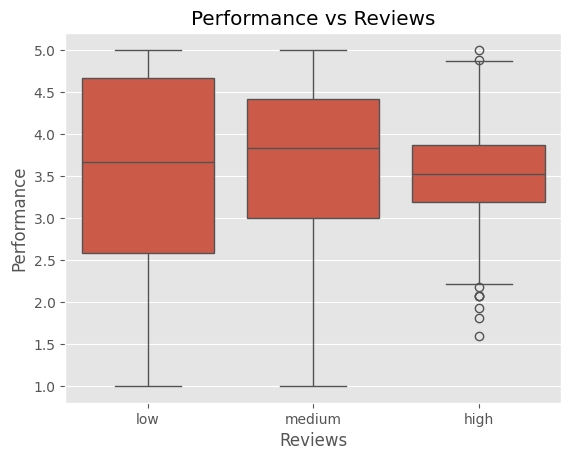

In [ ]:
# Scatterplot of performance and log(reviews)
sns.boxplot(data=df_clean, x='review_category', y='performance')
plt.title('Performance vs Reviews')
plt.xlabel('Reviews')
plt.ylabel('Performance')
plt.show()

Drugs have varied distribution of performance score accross all review categories, there seem to be no bias in the review distribution.

## SUMMARY


STREAMLITE APP

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.4 MB/s eta 0:00:00


In [ ]:
df_clean.head(3)

,condition,drug,indication,type,reviews,effectiveness,ease_of_use,satisfaction,effectiveness_cat,ease_of_use_cat,satisfaction_cat,performance,weighted_performance,disease_class,review_category
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994,2.52,3.01,1.84,low,medium,Very Low,2.456667,2.482,Infectious Disease,high
1,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755,2.78,3.00,2.08,low,low,Low,2.620000,2.684,Infectious Disease,high
2,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57,medium,high,Low,3.263333,3.242,Infectious Disease,high


In [ ]:
# saving the clean dataframe
df_clean.to_csv('df_clean.csv', index=False)


## SUMMARY

Based on the analysis of the drug performance dataset, here are the key findings:

**Data Overview and Cleaning:**
- The dataset contains information on drug performance metrics, including effectiveness, ease of use, satisfaction, and reviews.
- There were no missing values found.
- Duplicate rows were identified and removed, resulting in a clean dataset of 1753 unique entries.
- The 'Information' column was dropped as it was not essential for the analysis.
- 'Reviews' column was cleaned by removing the 'Reviews' string and converting it to an integer.
- Categorical data in 'Indication' and 'Type' columns containing '\r\n' were replaced with 'Unknown'.
- Columns were renamed for consistency and ease of use.

**Univariate Analysis:**
- Distributions of effectiveness, ease of use, and satisfaction scores show varied patterns, with effectiveness and ease of use having fewer drugs rated below 3.0.
- The number of reviews is heavily skewed towards lower counts.
- Categorical analysis of scores revealed:
    - Effectiveness: Most drugs show medium effectiveness, with similar numbers in high and low categories.
    - Ease of Use: A large majority of drugs are rated as having very high ease of use.
    - Satisfaction: Patient satisfaction scores are varied, with peaks at the extreme ends and in the middle.
- Drug Indication: The majority of drugs  used are "On Label", followed by "Off Label", with a small number of "Unknown" indications.
- Drug Type: Prescription drugs (RX) are the most common, followed by Over-The-Counter (OTC) drugs.

**Bivariate and Multivariate Analysis:**
- Drugs with "Unknown" indications showed the highest average effectiveness, although this category has a small sample size. Off-Label drugs had higher average effectiveness than On-Label drugs.
- OTC drugs, on average, showed higher performance (average of effectiveness, ease of use, and satisfaction) compared to RX and RX/OTC types.
- There was no clear clustering of drug indications or types when visualizing effectiveness against satisfaction, indicating these categories are distributed across performance scores.

**Top Performing Drugs (Overall and Weighted):**
- Using a simple average 'performance' score, top drugs included examples from various classes like antihistamines, antibiotics, and antiinfectives.
- Using a 'weighted_performance' score (prioritizing effectiveness), antihypertensives and ophthalmic drugs also appeared in the top performers.

**Drug Type Performance Comparison:**
- OTC drugs, on average, exhibited higher overall performance scores.
- Prescription drugs had a performance average close to the "Unknown" type but with a wider range of performance.
- RX/OTC drugs had the lowest average performance.

**Most Reviewed Disease Conditions and Categories:**
- Hypertension was the disease condition with the highest total number of reviews, followed by Fibromyalgia and Bacterial UTI.
- Categorizing conditions into major disease classes showed that Cardiovascular conditions had the highest total reviews, followed by Infectious Diseases and Musculoskeletal conditions.
- A wordcloud visualization highlighted the most frequently treated disease conditions in the dataset.

**Effectiveness and Satisfaction by Disease Class:**
- Respiratory drugs showed the highest mean effectiveness and satisfaction scores.
- The specific drugs listed for treating Respiratory illness in this dataset were Modafinil and Armodafinil for Sleepiness Due To Obstructive Sleep Apnea.

**Underperforming Drugs with High Reviews:**
- No drugs were found to have consistently low performance (≤ 2) despite having a high number of reviews (> 5000) in this dataset.

**Best Performing Drugs within Each Disease Category:**
- A table was generated showing the top 2 drugs by weighted performance within each disease class, filtered for drugs with at least 50 reviews. This table provides specific drug recommendations based on performance within their respective disease categories.

**Correlation Analysis:**
- There is a positive correlation between effectiveness, ease of use, and satisfaction scores.
- Satisfaction is most strongly correlated with effectiveness.
- Reviews show a weak negative correlation with the performance metrics.

**Bias in Reviews based on Performance:**
- Performance scores were varied across different review count categories (low, medium, high), suggesting no significant bias in performance based on the number of reviews.

**Streamlit App:**
- A Streamlit app script (https://lkfq4524zhqktfrysbbt8w.streamlit.app/) was created to allow interactive exploration of the data, including viewing top drugs by disease class, recommending drugs based on user-input condition and drug type filters.